# *1．要点*

分類問題の出力層は、各クラスの確率を出力する。

●ニューラルネットワークを順伝播の流れ

①訓練データとして入力データと正解ラベルのペアを用意する。

②入力データをニューラルネットワークに渡し、線形変換と非線形変換を経て、出力値が計算される。

③出力値と正解ラベルを比較し誤差関数により誤差を計算する。誤差は値が小さいほど正解に近いことを意味している。

●誤差関数

代表的な損失関数　

1.   平均二乗和誤差（残差二乗和誤差）

$
\frac{1}{2} \sum_{n=0}^{k} (y_n - t_n)^2
$

平均二乗和の場合は 1/N 

$
 y_n: NNの出力
$
$
，t_n: 教師データ
$

2.   クロスエントロピー誤差（交差エントロピー誤差）

$
E = -\sum_{k} t_k log {y_k}
$

$
 y_n: NNの出力
$
$
，t_n: 教師データ
$


・分類問題ではクロスエントロピー誤差を用いる

・回帰問題では平均二乗和誤差を用いる

●出力層の活性化関数

＜出力層の中間層との違い＞

・中間層：閾値の前後で信号の強弱を調整

・出力層：信号の大きさ（比率）はそのままで変換

・分類問題の場合出力層の出力は 0 ～ 1 の範囲に限定し、総和を1とする（確率出力）

※出力層と中間層では利用する活性化関数は異なる


●分類問題と回帰問題のどちらにニューラルネットワークを用いるかで出力層の活性化関数を変更する必要がある

回帰問題：恒等関数　　　二値分類問題：シグモイド関数　　　多クラス分類問題：ソフトマックス関数


恒等関数：
$
f(u) = u
$

シグモイド関数：
$
f(u) = \frac{1}{1 + exp^{-u}}
$ 

ソフトマックス関数：
$
f(i, u) = \frac{exp^{u_i}}{\sum^K_{k = 1}exp^{u_k}}  
$ 

# *2．確認テスト*

**確認テスト**

二乗和誤差について

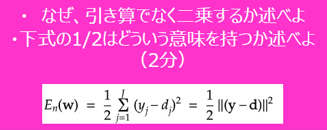



**解答**

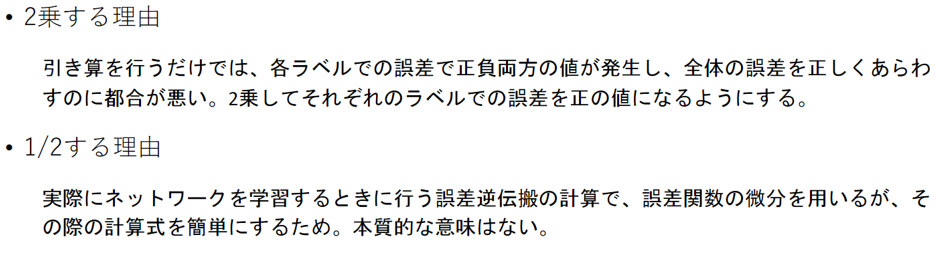

**確認テスト　ソフトマックス関数の処理の説明**


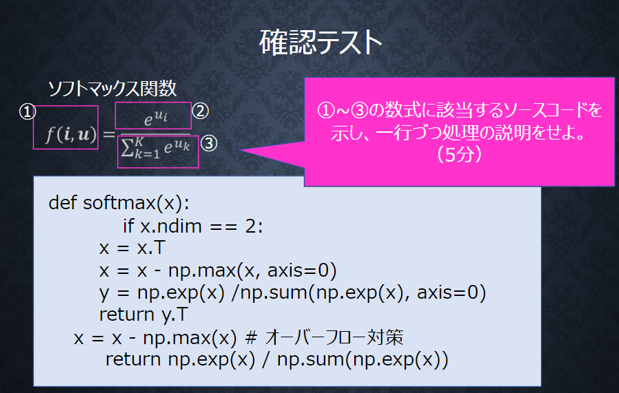

**解答**

19行から23行はミニバッチ用

25行目は指数関数計算におけるオーバーフロー対策

26行目がソフトマックス関数の数式そのものを表す

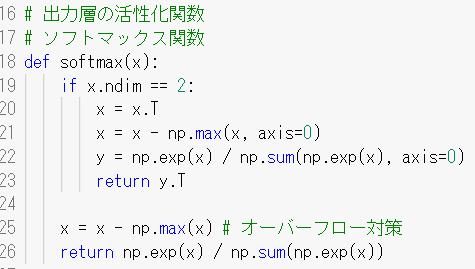

**確認テスト　交差エントロピー誤差関数の処理の説明**

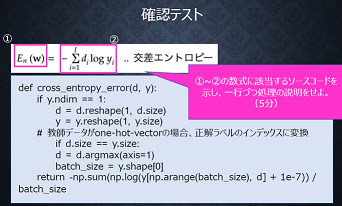

**解答**

49行目がクロスエントロピー誤差関数の数式そのものを表す

+1e-7 は np.log(0) を避けるための対策

数式よりクロスエントロピー誤差は正解ラベルに対応した出力の結果によってその値が決まることがわかる

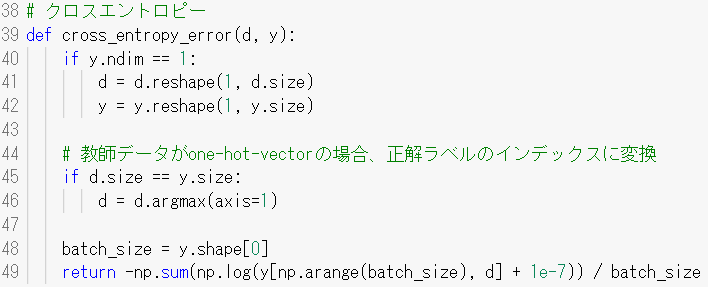

# *3．実装演習*

●数式とコード



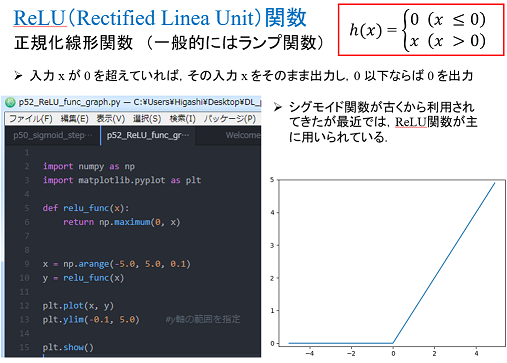

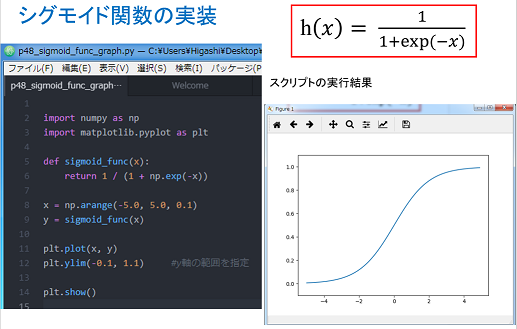

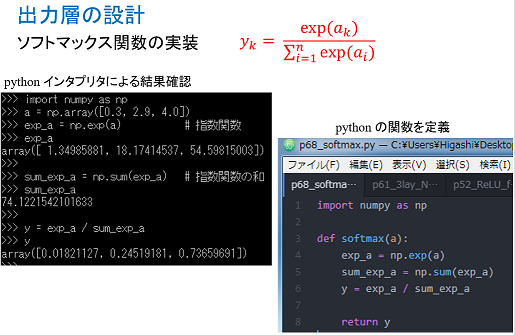

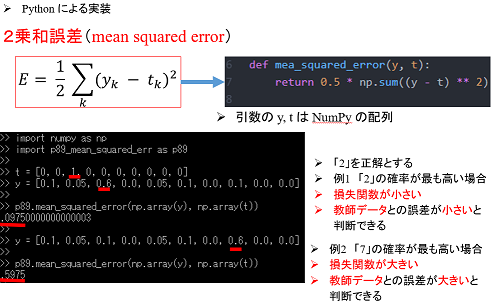

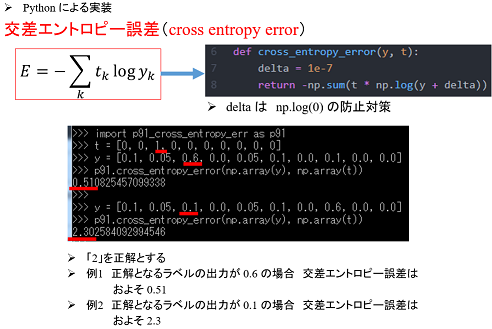

# *準備*

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2')

# importと関数定義

In [ ]:
import numpy as np
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")


# 順伝播（単層・単ユニット）

In [ ]:
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
#W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
b = 0.5

## 試してみよう_数値の初期化
#b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1]
 [0.2]]

*** バイアス ***
0.5

*** 入力 ***
[2 3]

*** 総入力 ***
[1.3]

*** 中間層出力 ***
[1.3]



# 順伝播（単層・複数ユニット）


In [ ]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
#W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)


#  総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]

*** バイアス ***
[0.1 0.2 0.3]

*** 入力 ***
[ 1.  5.  2. -1.]

*** 総入力 ***
[1.4 2.2 3. ]

*** 中間層出力 ***
[0.80218389 0.90024951 0.95257413]



# 順伝播（3層・複数ユニット）

In [ ]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

*** バイアス3 ***
[1 2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[0.6 1.3 2. ]

出力合計: 3.9


# 多クラス分類（2-3-4ネットワーク）

In [ ]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4, 0.7, 1.0],
        [0.2, 0.5, 0.8, 1.1],
        [0.3, 0.6, 0.9, 1.2]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2, 0.3, 0.4])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2.])

# 目標出力
d = np.array([0, 0, 0, 1])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)



##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4 0.7 1. ]
 [0.2 0.5 0.8 1.1]
 [0.3 0.6 0.9 1.2]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2 0.3 0.4]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29 3.56 4.83]

*** 出力1 ***
[0.01602796 0.05707321 0.20322929 0.72366954]

出力合計: 1.0

##### 結果表示 #####
*** 出力 ***
[0.01602796 0.05707321 0.20322929 0.72366954]

*** 訓練データ ***
[0 0 0 1]

*** 誤差 ***
0.3234202933601941



# 回帰（2-3-2ネットワーク）

In [ ]:
# 回帰
# 2-3-2ネットワーク

# ！試してみよう_ノードの構成を 3-5-4 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = u2
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))
    
    return y, z1

# 入力値
x = np.array([1., 2.])
network =  init_network()
y, z1 = forward(network, x)
# 目標出力
d = np.array([2., 4.])
# 誤差
loss = functions.mean_squared_error(d, y)
## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.02 2.29]

*** 出力1 ***
[1.02 2.29]

出力合計: 3.9

##### 結果表示 #####
*** 中間層出力 ***
[0.6 1.3 2. ]

*** 出力 ***
[1.02 2.29]

*** 訓練データ ***
[2. 4.]

*** 誤差 ***
0.9711249999999999



# 2値分類（2-3-1ネットワーク）

In [ ]:
# 2値分類
# 2-3-1ネットワーク

# ！試してみよう_ノードの構成を 5-10-1 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.2],
        [0.4],
        [0.6]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1])
    return network


# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']    

    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層の総出力
    z1 = functions.relu(u1)
    # 出力層の総入力
    u2 = np.dot(z1, W2) + b2
    # 出力層の総出力
    y = functions.sigmoid(u2)
            
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1


# 入力値
x = np.array([1., 2.])
# 目標出力
d = np.array([1])
network =  init_network()
y, z1 = forward(network, x)
# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("誤差",  loss)

##### ネットワークの初期化 #####
##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]

*** 中間層出力1 ***
[0.6 1.3 2. ]

*** 総入力2 ***
[1.94]

*** 出力1 ***
[0.87435214]

出力合計: 3.9

##### 結果表示 #####
*** 中間層出力 ***
[0.6 1.3 2. ]

*** 出力 ***
[0.87435214]

*** 訓練データ ***
[1]

*** 誤差 ***
0.13427195993720972

